In [ ]:
import os
import sys
import torch
import pandas as pd
import np
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx


In [5]:
import torch
import os

# Data Loading: Cleaned Dataset
cleaned_path = os.path.join("data", "processed", "cleaned_data.pt")
data = torch.load(cleaned_path)

print("Cleaned data loaded!")


Cleaned data loaded!
Data(x=[10199, 788], edge_index=[2, 1132578], edge_type=[1700108], edge_weight=[1132578], y1=[10199], y2=[10199], y=[10199], train_mask=[10199], val_mask=[10199], test_mask=[10199])


##  Overall Graph Statistics


In [7]:
# Graph Conversion: PyTorch → NetworkX --> The graph from PyTorch Geometric is converted to a NetworkX graph
G_nx = to_networkx(data, to_undirected=True)
print(f"# Nodes: {G_nx.number_of_nodes()}")
print(f"# Edges: {G_nx.number_of_edges()}")

# Nodes: 10199
# Edges: 902856


### Graph Conversion Summary

The PyTorch Geometric graph was successfully converted to a NetworkX graph, resulting in:
- **Nodes:** 10,199
- **Edges:** 902,856

This confirms the full graph structure is now available in NetworkX format for further analysis and visualization.


In [8]:
# Degree Statistics --> Computes the number of connections each node has (node degree)

degrees = dict(G_nx.degree())
deg_values = np.array(list(degrees.values()))
print("Average degree:", deg_values.mean())

# Clustering Coefficient --> Measures how connected a node’s neighbors are to each other
clustering = nx.clustering(G_nx)
clust_values = np.array(list(clustering.values()))
print("Average clustering:", clust_values.mean())


Average degree: 177.04794587704677
Average clustering: 0.22037798947736364


### Overall Degree and Clustering Statistics

- **Average degree:** 177  
- **Average clustering coefficient:** 0.22

These metrics provide a global summary of the network’s connectivity and local cohesion, calculated across all nodes without distinguishing between bots and non-bots.


In [9]:
# Bot vs Non-Bot Analysis

y_bot = data.y2.numpy()  #  contains the bot labels (1 = bot, 0 = non-bot)
bot_nodes = np.where(y_bot == 1)[0]
nonbot_nodes = np.where(y_bot == 0)[0]

bot_deg = [degrees[n] for n in bot_nodes]
nonbot_deg = [degrees[n] for n in nonbot_nodes]

print("Bot avg degree:", np.mean(bot_deg))
print("Non-bot avg degree:", np.mean(nonbot_deg))


Bot avg degree: 114.19177583697234
Non-bot avg degree: 200.22990202657363


### Bot vs Non-Bot Degree Analysis

- **Bot average degree:** 114  
- **Non-bot average degree:** 200

This comparison shows that bots tend to have significantly fewer connections than non-bot users, reflecting their more limited integration into the overall network.


##  Degree and Clustering Distribution Visualization

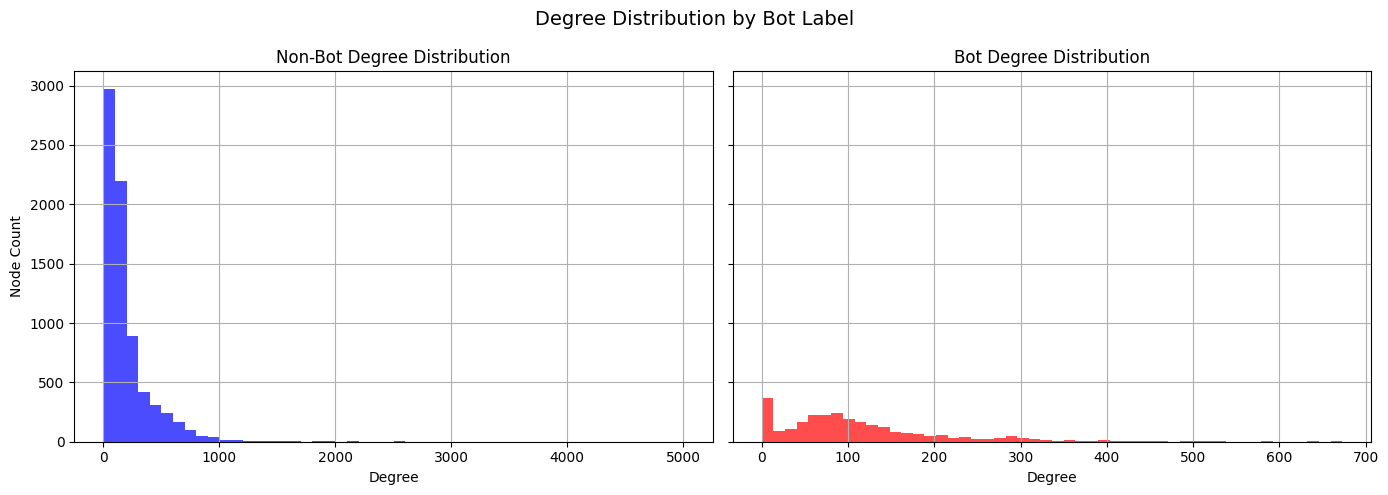

In [13]:
import matplotlib.pyplot as plt

# Degree refers to the number of direct connections (edges) a node has in the graph.
# Node count represents how many nodes in the graph have that specific degree value.

# Extract degree data for bot and non-bot nodes
bot_deg = [degrees[n] for n in bot_nodes]
nonbot_deg = [degrees[n] for n in nonbot_nodes]

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Non-bot histogram
axs[0].hist(nonbot_deg, bins=50, color='blue', alpha=0.7)
axs[0].set_title("Non-Bot Degree Distribution")
axs[0].set_xlabel("Degree")
axs[0].set_ylabel("Node Count")
axs[0].grid(True)

# Bot histogram
axs[1].hist(bot_deg, bins=50, color='red', alpha=0.7)
axs[1].set_title("Bot Degree Distribution")
axs[1].set_xlabel("Degree")
axs[1].grid(True)

plt.suptitle("Degree Distribution by Bot Label", fontsize=14)
plt.tight_layout()
plt.show()



### RESULTS 
The degree distribution analysis reveals distinct behavioral patterns between bots and non-bot users in the social network. Non-bot users show a broad, long-tailed distribution, with a significant number of nodes having high degrees—some exceeding 4000 connections. This suggests that real users are more socially active, with some functioning as central hubs or influencers. 

In contrast, bots exhibit a much narrower degree range, mostly concentrated below 200, with virtually none exceeding 700. This indicates that bots are less connected, possibly to avoid detection or due to automated account limitations. The stark difference in degree distributions suggests that node degree is a strong indicator for distinguishing between human and automated activity in the network.

### Non-bot Degree Example
In real life, non-bot users resemble highly social individuals or influencers — for example, a celebrity or public figure who interacts with thousands of followers across different platforms, naturally achieving a very high degree of connections

### Bot Degree Example
Bots, by contrast, behave more like automated marketing accounts or spam bots that follow or message random users in small batches, resulting in low to moderate connection counts, and rarely forming the massive networks seen with genuine human influencers.


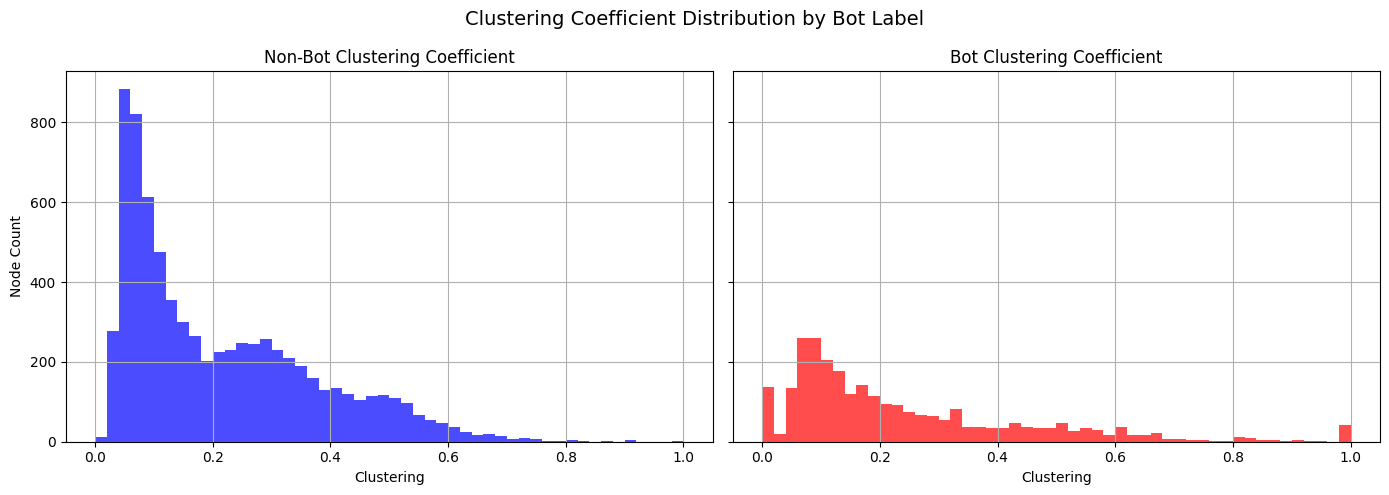

In [15]:
# Clustering data

# Clustering coefficient measures how connected a node's neighbors are to each other.
# It reflects the local density of connections in the graph (triadic closure).
# Higher values typically indicate more social or community-like behavior.


bot_clust = [clustering[n] for n in bot_nodes]
nonbot_clust = [clustering[n] for n in nonbot_nodes]

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Non-bot clustering histogramı
axs[0].hist(nonbot_clust, bins=50, color='blue', alpha=0.7)
axs[0].set_title("Non-Bot Clustering Coefficient")
axs[0].set_xlabel("Clustering")
axs[0].set_ylabel("Node Count")
axs[0].grid(True)

# Bot clustering histogramı
axs[1].hist(bot_clust, bins=50, color='red', alpha=0.7)
axs[1].set_title("Bot Clustering Coefficient")
axs[1].set_xlabel("Clustering")
axs[1].grid(True)

plt.suptitle("Clustering Coefficient Distribution by Bot Label", fontsize=14)
plt.tight_layout()
plt.show()


### RESULTS 

The clustering coefficient analysis reveals a clear distinction between bot and non-bot behavior within the network. Non-bot users exhibit a wide range of clustering values, with many nodes falling between 0.1 and 0.3, indicating the presence of well-connected neighborhoods and triadic closures—hallmarks of genuine social interactions. 

In contrast, bot users show significantly lower clustering coefficients, with the majority concentrated near zero. This suggests that bots are often isolated or form sparse connections without embedding into tightly-knit communities. The stark difference in clustering behavior further reinforces the notion that bots lack organic integration in the network structure, making clustering coefficient a valuable feature for bot detection.

### Real Life Examples
### Non-bot Clustering Example
In real life, non-bot behavior resembles close friend groups where if Alice knows Bob, and Bob knows Carol, Alice is also likely to know Carol — forming a triangle. This reflects the natural tendency of human social circles to overlap, which leads to higher clustering coefficients

### Bot Clustering Example
Bots, on the other hand, behave more like automated accounts that randomly follow or interact with unrelated users. For example, a spam bot may follow thousands of users without any of those users knowing each other, resulting in almost no triangles and therefore very low clustering


##  Bot vs Non-Bot Comparative Analysis and Anomaly Detection

### 📌 Threshold Selection Rationale

We selected the following threshold values based on the degree and clustering coefficient distributions we observed in the network:

- **low_degree_thresh = 30**  
  This value targets nodes with very few connections. In the bot degree distribution, the majority of bot nodes are concentrated below 100, with a sharp peak around 0–30. Setting the threshold at 30 allows us to capture the most weakly connected and potentially automated accounts without being too aggressive.

- **high_degree_thresh = 700**  
  Non-bot users can have extremely high degrees (some up to 4000–5000), but bot nodes rarely exceed 700. By using 700 as a cutoff, we can flag potential influencer hubs or spammy super-connectors for further analysis.

- **low_clustering_thresh = 0.2**  
  While non-bot nodes show a wide range of clustering values, bot nodes predominantly cluster between 0.1 and 0.2. Increasing the threshold to 0.2 allows us to capture a broader range of suspicious nodes while excluding well-integrated non-bot users that typically have higher clustering coefficients.

Overall, these thresholds help us isolate anomalous node profiles that stand out either due to isolation (low degree, low clustering) or hyper-connectivity (high degree).


In [26]:
# Threshold examples for anomaly detection
low_clustering_thresh = 0.1
low_degree_thresh = 30
high_degree_thresh = 700

anomalies = []

# Identify nodes with abnormal degree and clustering combinations
for node in G_nx.nodes():
    deg = degrees[node]
    clust = clustering[node]
    if deg < low_degree_thresh and clust < low_clustering_thresh:
        anomalies.append((node, 'low_deg_low_clust'))
    elif deg > high_degree_thresh and clust < low_clustering_thresh:
        anomalies.append((node, 'high_deg_low_clust'))

print(f"Detected {len(anomalies)} potential anomalies.")
for a in anomalies[:10]:  # Show first 10 examples
    print(a)


Detected 209 potential anomalies.
(106, 'high_deg_low_clust')
(211, 'low_deg_low_clust')
(233, 'low_deg_low_clust')
(236, 'low_deg_low_clust')
(241, 'low_deg_low_clust')
(296, 'low_deg_low_clust')
(301, 'low_deg_low_clust')
(311, 'high_deg_low_clust')
(376, 'low_deg_low_clust')
(489, 'low_deg_low_clust')


**Summary of results:**  
- Total anomalies detected: **209 nodes**
- Examples:
    - Node 106 → high degree, low clustering (possible spam bot or influencer)
    - Node 211, 233, 236 → low degree, low clustering (possible isolated bots)

This analysis helps prioritize which nodes to investigate further for bot detection or unusual activity, using simple yet interpretable graph features.

In [28]:
import numpy as np

# Calculate degree and clustering arrays for bots and non-bots
bot_deg = np.array([degrees[n] for n in bot_nodes])
bot_clust = np.array([clustering[n] for n in bot_nodes])
nonbot_deg = np.array([degrees[n] for n in nonbot_nodes])
nonbot_clust = np.array([clustering[n] for n in nonbot_nodes])

print("Bot degree mean:", bot_deg.mean())
print("Non-bot degree mean:", nonbot_deg.mean())
print("Bot clustering mean:", bot_clust.mean())
print("Non-bot clustering mean:", nonbot_clust.mean())


Bot degree mean: 114.19177583697234
Non-bot degree mean: 200.22990202657363
Bot clustering mean: 0.24092642378830945
Non-bot clustering mean: 0.2127995305474913


### Bot vs Non-Bot Degree and Clustering Summary

- **Bot degree mean:** 114  
- **Non-bot degree mean:** 200  
- **Bot clustering mean:** 0.24  
- **Non-bot clustering mean:** 0.21

 **Interpretation:**  
- Bots, on average, have fewer connections (degree) compared to non-bots, reflecting their more limited network reach.
- Interestingly, bots show slightly higher clustering coefficients than non-bots, suggesting that when bots are connected, they may form small, tightly-knit clusters or interact within specific subgroups.
- This contrast in average connectivity and local density can help refine bot detection strategies by combining both degree- and structure-based features.

**Note:**  
Unlike the overall average metrics, these values specifically compare the bot and non-bot groups separately, providing more targeted behavioral insights.


In [30]:
# Identify top 10 nodes with highest degree and lowest clustering coefficient
top_deg_nodes = sorted(degrees, key=degrees.get, reverse=True)[:10]
low_clust_nodes = sorted(clustering, key=clustering.get)[:10]

print("Top 10 nodes by degree:", top_deg_nodes)
print("Top 10 nodes by lowest clustering:", low_clust_nodes)


Top 10 nodes by degree: [3632, 5417, 5241, 1914, 2180, 8296, 311, 960, 3487, 7700]
Top 10 nodes by lowest clustering: [211, 233, 236, 241, 296, 301, 719, 742, 850, 958]


### Top 10 Nodes by Degree and Lowest Clustering

- **Top 10 nodes by degree:** [3632, 5417, 5241, 1914, 2180, 8296, 311, 960, 3487, 7700]  
These are the most highly connected nodes in the network, potentially representing influential users, central hubs, or even spam bots trying to maximize their reach.

- **Top 10 nodes by lowest clustering:** [211, 233, 236, 241, 296, 301, 719, 742, 850, 958]  
These nodes have neighbors that are not well connected to each other, suggesting roles as bridges, outliers, or isolated accounts—often seen in bot or anomaly behavior.

  **Interpretation:**  
The top-degree nodes highlight the central players in the network, while the lowest-clustering nodes point to structurally weak or isolated accounts. Together, they help map both the core and the periphery of the network, providing valuable targets for further investigation.
